<a href="https://colab.research.google.com/github/maryamshahani/ImageColorProcessingPillow/blob/main/ImageColorProcessingPillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#connect to google drive and mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
#images file path:
image_o = '/content/drive/MyDrive/GoogleColabFiles/o.png'
image_x = '/content/drive/MyDrive/GoogleColabFiles/x.png'

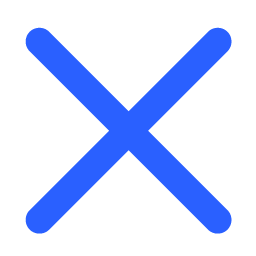

In [119]:
from PIL import Image, ImageChops, ImageFilter

#Create a PIL Image objects
x = Image.open(image_x)
o = Image.open(image_o)

x

In [120]:
#Find out attributes of Image Objects
print('size of the image o :', o.size, 'color mode of the image o:', o.mode)
print('size of the image x :', x.size, 'color mode of the image x:', x.mode)

size of the image o : (256, 256) color mode of the image o: RGB
size of the image x : (256, 256) color mode of the image x: RGB


(-0.5, 255.5, 255.5, -0.5)

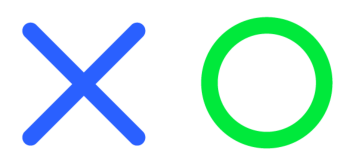

In [121]:
from matplotlib import pyplot as plt

#plot 2 images one besides the other
plt.subplot(121), plt.imshow(x)
plt.axis('off')
plt.subplot(122), plt.imshow(o)
plt.axis('off')

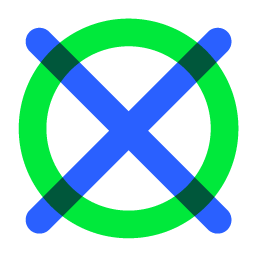

In [122]:
#multiply images
merged = ImageChops.multiply(x,o)

merged

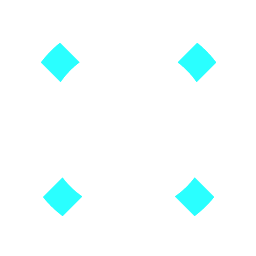

In [123]:
#adding two images
add = ImageChops.add(x,o)

add

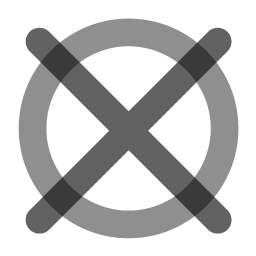

In [124]:
#convert colour mode grayscale
greyscale = merged.convert('L') 

greyscale

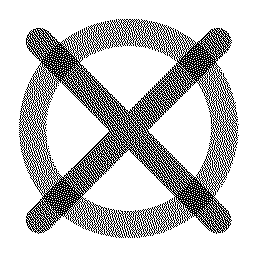

In [125]:
#convert colour mode binary
binary_mode = merged.convert('1') 

binary_mode

# As this Binary image is disgusting we can tackle this manually so we need to access each pixel and adjust it accordingly

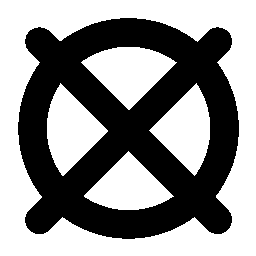

In [126]:
#mapping the pixels of the image so we can use them as coordinates
pixel = merged.load()

#a nested loop to parse through all the pixels in the image
for row in range(merged.size[0]):
  for column in range(merged.size[1]):
    if pixel[row, column] != (255,255,255):  # this tuple shows White in RGB
      pixel[row, column] = (0,0,0) #Black in RGB

merged

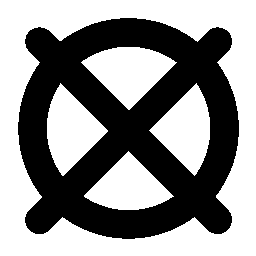

In [127]:
#result would be same as this:
pixel = greyscale.load()

for row in range(greyscale.size[0]):
  for column in range(greyscale.size[1]):
    if pixel[row, column] != (255):  #we have full control like:   #if pixel[row, column] != (255) and row > 128:    #if pixel[row, column] != (255) and row > 128 and column > 128:
      pixel[row,column] = (0)

greyscale

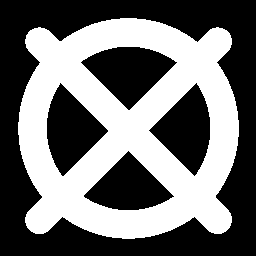

In [128]:
#1.invert image
invert = ImageChops.invert(greyscale)

invert

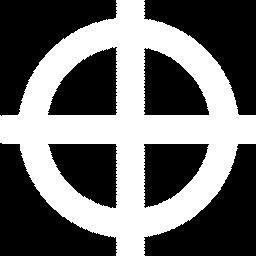

In [129]:
#2.invert by subtraction
bg = Image.new('L', (256, 256), color=(255)) #create a new image with a solid white background
subt = ImageChops.subtract(bg, greyscale) #subtract image from background

#3. rotate
rotate = subt.rotate(45)
rotate

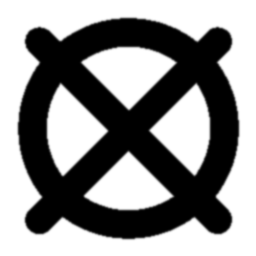

In [130]:
#gaussian blur
blur = greyscale.filter(ImageFilter.GaussianBlur(radius=1))

blur

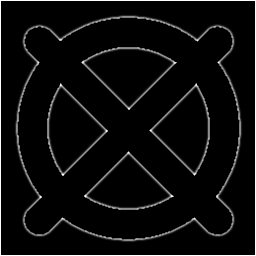

In [132]:
#blur edge detection
edge = blur.filter(ImageFilter.FIND_EDGES)

edge

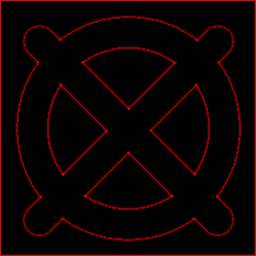

In [133]:
#change edge colours
edge = edge.convert('RGB')
bg_red = Image.new('RGB', (256,256), color=(255,0,0))

filled_edge = ImageChops.darker(bg_red, edge)
filled_edge

In [134]:
#save image in the directory
edge.save('/content/drive/MyDrive/GoogleColabFiles/processed.png')